<a href="https://colab.research.google.com/github/pratyushagrawal77/NLP_S5/blob/main/Pratyush_Agrawal_22070126077_NLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pratyush Agrawal

22070126077

A3

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Importing Libraries and Downloading NLTK Data

This code block imports all the necessary libraries required for loading data, preprocessing text, building machine learning models, and evaluating their performance.

### 1. **Importing Core Libraries:**
   - **`import pandas as pd`**: Pandas is used for data manipulation and analysis. It provides powerful tools for reading, cleaning, and analyzing data in tabular form.
   - **`import numpy as np`**: NumPy is used for numerical operations and handling arrays. It is often used in machine learning for mathematical computations.

### 2. **Text Preprocessing Libraries:**
   - **`import re`**: The `re` library is used for regular expressions, which helps in finding and manipulating patterns in text (e.g., removing URLs, special characters).
   - **`import nltk`**: NLTK (Natural Language Toolkit) is a popular library for natural language processing (NLP) tasks.
   - **`from nltk.corpus import stopwords`**: This imports a list of common stopwords (e.g., "the", "is", "in") that are often removed from text to focus on meaningful words.
   - **`from nltk.tokenize import word_tokenize`**: The `word_tokenize` function is used to split text into individual tokens (words).
   - **`from nltk.stem import WordNetLemmatizer`**: The `WordNetLemmatizer` is used for lemmatization, which reduces words to their base form (e.g., "running" becomes "run").

### 3. **Data Splitting and Evaluation Libraries:**
   - **`from sklearn.model_selection import train_test_split`**: This function is used to split the dataset into training and test sets.
   - **`from sklearn.metrics import classification_report, confusion_matrix`**: These metrics are used to evaluate the performance of a classification model:
     - **`classification_report`** provides precision, recall, F1-score, and accuracy metrics.
     - **`confusion_matrix`** shows the counts of true positives, true negatives, false positives, and false negatives.

### 4. **Visualization Libraries:**
   - **`import matplotlib.pyplot as plt`**: Matplotlib is a powerful library for creating visualizations such as line charts, bar charts, and scatter plots.
   - **`import seaborn as sns`**: Seaborn is built on top of Matplotlib and provides more aesthetic, easy-to-use functions for statistical data visualization (e.g., heatmaps, correlation plots).

### 5. **Keras Libraries for Neural Networks:**
   - **`from tensorflow.keras.preprocessing.text import Tokenizer`**: Tokenizer is used to convert text into sequences of tokens (numbers).
   - **`from tensorflow.keras.preprocessing.sequence import pad_sequences`**: This is used to ensure all sequences have the same length by adding padding to shorter sequences.
   - **`from tensorflow.keras.models import Sequential`**: Sequential is a simple model type that allows you to stack layers one by one in a linear manner.
   - **`from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout`**:
     - **`Embedding`**: The embedding layer converts words (encoded as integers) into dense vectors.
     - **`LSTM`**: Long Short-Term Memory layers are a type of recurrent neural network (RNN) that can learn and capture sequential patterns in data.
     - **`Dense`**: Fully connected (dense) layers are used in neural networks to connect each neuron in one layer to every neuron in the next layer.
     - **`Dropout`**: Dropout is used to prevent overfitting by randomly "dropping out" neurons during training.

### 6. **Callbacks for Early Stopping:**
   - **`from tensorflow.keras.callbacks import EarlyStopping`**: EarlyStopping is a callback that stops training when a monitored metric (e.g., validation loss) stops improving for a certain number of epochs, preventing overfitting and saving time.

### 7. **Downloading NLTK Data:**
   - **`nltk.download('stopwords')`**: Downloads the list of stopwords.
   - **`nltk.download('punkt')`**: Downloads the tokenizer data needed to split text into tokens.
   - **`nltk.download('wordnet')`**: Downloads the WordNet corpus required for lemmatization, which provides base forms of words.


In [ ]:
# Load data
file_path = "C:\\Users\\laksh\\Downloads\\archive (4)\\training.1600000.processed.noemoticon.csv"
data = pd.read_csv(file_path, encoding='latin1', header=None)

# Assign column names
data.columns = ['Sentiment', 'ID', 'Date', 'Query', 'User', 'Text']

# Preprocessing Steps
def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs, hashtags, symbols, and extra whitespace
    text = re.sub(r'http\S+|www\S+|https\S+|@\S+|#\S+|[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]

    return ' '.join(tokens)

# Apply preprocessing
data['Text'] = data['Text'].apply(preprocess_text)

# Remove empty rows and duplicates
data.dropna(inplace=True)
data.drop_duplicates(subset=['Text'], inplace=True)

# Convert Sentiment column to binary (0 = negative, 1 = positive)
data['Sentiment'] = data['Sentiment'].apply(lambda x: 1 if x == 4 else 0)


# Data Loading and Preprocessing

This code is responsible for loading the dataset, performing text preprocessing, cleaning the data, and converting sentiment labels into a binary format.

### 1. **Loading the Data:**
   - **`file_path = "C:\\Users\\laksh\\Downloads\\archive (4)\\training.1600000.processed.noemoticon.csv"`**:
     - Specifies the path to the dataset, which is a CSV file containing processed tweets without emoticons.
   - **`data = pd.read_csv(file_path, encoding='latin1', header=None)`**:
     - Loads the dataset using pandas `read_csv()` function. The dataset uses Latin-1 encoding, and since it doesn't have headers, `header=None` is used to prevent the first row from being treated as column names.

### 2. **Assigning Column Names:**
   - **`data.columns = ['Sentiment', 'ID', 'Date', 'Query', 'User', 'Text']`**:
     - The dataset is assigned column names for better readability and ease of access:
       - `Sentiment`: The sentiment label (target variable).
       - `ID`: A unique identifier for each tweet.
       - `Date`: The date the tweet was posted.
       - `Query`: A placeholder for the query (not useful in this case).
       - `User`: The user who posted the tweet.
       - `Text`: The actual tweet content.

### 3. **Text Preprocessing:**
   The preprocessing function is applied to clean the text data.
   - **Lowercasing:**
     - **`text = text.lower()`**: Converts the text to lowercase to maintain uniformity.
   - **Removing Unwanted Patterns:**
     - **`re.sub(r'http\S+|www\S+|https\S+|@\S+|#\S+|[^A-Za-z\s]', '', text)`**:
       - This regex pattern removes URLs (`http`, `https`, `www`), mentions (`@user`), hashtags (`#`), and any non-alphabetical characters (e.g., punctuation, symbols).
     - **`re.sub(r'\s+', ' ', text).strip()`**: Replaces extra whitespace with a single space and removes leading/trailing spaces.
   - **Tokenization:**
     - **`tokens = word_tokenize(text)`**: Splits the cleaned text into individual tokens (words).
   - **Lemmatization:**
     - **`lemmatizer = WordNetLemmatizer()`**: Initializes a lemmatizer that reduces words to their base or root form (e.g., "running" becomes "run").
     - **Stopword Removal**: **`if word not in stopwords.words('english')`**: Removes common stopwords like "the", "and", "in", etc., to focus on meaningful words.

   The function **`preprocess_text`** returns the cleaned, tokenized, and lemmatized text as a single string.

### 4. **Applying Preprocessing:**
   - **`data['Text'] = data['Text'].apply(preprocess_text)`**:
     - The `preprocess_text()` function is applied to each row in the `Text` column, cleaning the tweet content.

### 5. **Removing Empty Rows and Duplicates:**
   - **`data.dropna(inplace=True)`**: Removes any rows where the `Text` column is empty or contains NaN values.
   - **`data.drop_duplicates(subset=['Text'], inplace=True)`**: Removes duplicate rows based on the `Text` column, ensuring each tweet is unique.

### 6. **Converting Sentiment to Binary:**
   - **`data['Sentiment'] = data['Sentiment'].apply(lambda x: 1 if x == 4 else 0)`**:
     - Converts the `Sentiment` column into a binary format:
       - **1** represents **positive sentiment** (tweets labeled with 4).
       - **0** represents **negative sentiment** (tweets labeled with 0).


In [ ]:
# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['Text'])
word_index = tokenizer.word_index

max_sequence_length = max([len(x.split()) for x in data['Text']])

X_train = tokenizer.texts_to_sequences(train_data['Text'])
X_train = pad_sequences(X_train, maxlen=max_sequence_length, padding='post')

X_test = tokenizer.texts_to_sequences(test_data['Text'])
X_test = pad_sequences(X_test, maxlen=max_sequence_length, padding='post')

y_train = train_data['Sentiment'].values
y_test = test_data['Sentiment'].values


# Data Preparation and Preprocessing

This code is responsible for splitting the data into training and test sets, tokenizing the text, and padding the sequences to ensure uniform input length for the LSTM model.

### 1. **Splitting the Data:**
   - **`train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)`**:
     - The data is split into **training** and **test** sets using the `train_test_split` function.
     - `test_size=0.2` means that 20% of the data will be allocated to the test set, while 80% is used for training.
     - `random_state=42` ensures the split is reproducible, so every time you run this code, the split will be the same.

### 2. **Tokenization:**
   - **`Tokenizer(num_words=10000, oov_token='<OOV>')`**:
     - This initializes a tokenizer that will convert text into sequences of integers. The parameter `num_words=10000` limits the vocabulary to the 10,000 most frequent words.
     - `oov_token='<OOV>'` specifies that any out-of-vocabulary word will be replaced with the token `<OOV>`.
   - **`tokenizer.fit_on_texts(train_data['Text'])`**:
     - The tokenizer is "fitted" on the training data, meaning it learns the vocabulary based on the frequency of words in the training set. This will not affect the test set directly, as the test set should be treated as unseen data.
   - **`word_index = tokenizer.word_index`**:
     - This stores the mapping of words to their respective integer indices (used for encoding the text into sequences). Each word in the vocabulary is assigned a unique index.

### 3. **Determine Maximum Sequence Length:**
   - **`max_sequence_length = max([len(x.split()) for x in data['Text']])`**:
     - This calculates the maximum sequence length by identifying the longest sentence in the dataset. This ensures that all input sequences have the same length, which is necessary for the LSTM model.
     - `x.split()` splits the sentences into words, and `len()` measures how many words are in each sentence.

### 4. **Tokenize and Pad Sequences:**
   - **`X_train = tokenizer.texts_to_sequences(train_data['Text'])`**:
     - This converts each sentence in the training data into a sequence of integers, where each integer represents a word based on the `word_index`.
   - **`X_train = pad_sequences(X_train, maxlen=max_sequence_length, padding='post')`**:
     - The sequences are padded to ensure uniform length. Sentences shorter than the `max_sequence_length` are padded with zeros at the end (`padding='post'`).
   - **`X_test = tokenizer.texts_to_sequences(test_data['Text'])`** and **`X_test = pad_sequences(X_test, maxlen=max_sequence_length, padding='post')`**:
     - Similarly, the test data is tokenized and padded to match the `max_sequence_length` from the training data.

### 5. **Label Extraction:**
   - **`y_train = train_data['Sentiment'].values`** and **`y_test = test_data['Sentiment'].values`**:
     - The sentiment labels (target values) are extracted from the training and test data. These will be used as the target variable during model training and evaluation.


In [ ]:
# Model parameters for first set
batch_size = 4
embedding_dim = 10
lstm_units = 8

# Define the model
model_1 = Sequential()
model_1.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_sequence_length))
model_1.add(LSTM(units=lstm_units))
model_1.add(Dense(1, activation='sigmoid'))

# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_1 = model_1.fit(X_train, y_train, epochs=3, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=2)])


Epoch 1/3
295344/295344 [==============================] - 2090s 7ms/step - loss: 0.4763 - accuracy: 0.7720 - val_loss: 0.4578 - val_accuracy: 0.7830
Epoch 2/3
295344/295344 [==============================] - 2078s 7ms/step - loss: 0.4503 - accuracy: 0.7880 - val_loss: 0.4536 - val_accuracy: 0.7862
Epoch 3/3
295344/295344 [==============================] - 2077s 7ms/step - loss: 0.4452 - accuracy: 0.7914 - val_loss: 0.4532 - val_accuracy: 0.7867


# Explanation of Model 1 (Single LSTM Layer)

This code sets up a neural network using a single LSTM layer for binary classification. Below is a breakdown of the model's components and what they do.

### 1. **Model Parameters:**
   - **`batch_size = 4`**: The number of samples processed at once before updating the model weights.
   - **`embedding_dim = 10`**: This defines the size of the embedding vectors for each word in the input. Each word will be represented in 10 dimensions.
   - **`lstm_units = 8`**: The number of units (neurons) in the LSTM layer, which control the model’s capacity to capture patterns in the sequence data.

### 2. **Model Definition:**
   - **`model_1 = Sequential()`**: This initializes the model as a Sequential model, which stacks layers in a linear order.
   - **`Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_sequence_length)`**:
     - The embedding layer maps input tokens (words represented by integers) to dense vectors (embeddings) of size 10.
     - `input_dim=10000` defines the vocabulary size (up to 10,000 unique words).
     - `input_length` refers to the length of each input sequence.
   - **`LSTM(units=lstm_units)`**: The LSTM layer with 8 units. This is the only LSTM layer in this model, and it processes sequential input data, learning temporal relationships in the data.
   - **`Dense(1, activation='sigmoid')`**: A dense (fully connected) output layer with a single unit. The sigmoid activation function is appropriate for binary classification, producing an output probability between 0 and 1.

### 3. **Model Compilation:**
   - **`optimizer='adam'`**: The Adam optimizer is used for gradient descent, adjusting the model weights dynamically and efficiently.
   - **`loss='binary_crossentropy'`**: This is the loss function for binary classification, which measures how well the model performs during training.
   - **`metrics=['accuracy']`**: The model will track accuracy during training to monitor performance.

### 4. **Model Training:**
   - **`epochs=3`**: The number of complete passes through the training data is set to 3.
   - **`batch_size=4`**: The model processes 4 samples at a time before updating the weights.
   - **`validation_data=(X_test, y_test)`**: The model's performance will be validated on the test dataset (X_test, y_test) after each epoch.
   - **`callbacks=[EarlyStopping(monitor='val_loss', patience=2)]`**: Early stopping is used to avoid overfitting. If the validation loss does not improve for 2 consecutive epochs, training will stop early.

### 5. **Output:**
   After each epoch, the model will provide feedback on the training and validation accuracy and loss. If the validation loss plateaus for 2 epochs, the model stops training early to prevent overfitting.


In [ ]:
# Model parameters for second set
batch_size = 8
embedding_dim = 30
lstm_units = 16

# Define the model
model_2 = Sequential()
model_2.add(Embedding(input_dim=25000, output_dim=embedding_dim, input_length=max_sequence_length))
model_2.add(LSTM(units=lstm_units, return_sequences=True))
model_2.add(LSTM(units=lstm_units))
model_2.add(Dense(1, activation='sigmoid'))

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_2 = model_2.fit(X_train, y_train, epochs=3, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=2)])


Epoch 1/3
147672/147672 [==============================] - 1532s 10ms/step - loss: 0.4715 - accuracy: 0.7748 - val_loss: 0.4543 - val_accuracy: 0.7858
Epoch 2/3
147672/147672 [==============================] - 1538s 10ms/step - loss: 0.4452 - accuracy: 0.7910 - val_loss: 0.4507 - val_accuracy: 0.7891
Epoch 3/3
147672/147672 [==============================] - 1529s 10ms/step - loss: 0.4364 - accuracy: 0.7965 - val_loss: 0.4480 - val_accuracy: 0.7895


# Explanation of Model 2 (Two LSTM Layers)

This code defines and trains a deep learning model using two LSTM (Long Short-Term Memory) layers for a binary classification task. Below is a step-by-step breakdown of what happens in the code:

### 1. **Model Parameters:**
   - **`batch_size = 8`**: The number of samples the model processes before updating the weights.
   - **`embedding_dim = 30`**: The dimension of the word embeddings (i.e., how many dimensions each word is mapped to in the embedding layer).
   - **`lstm_units = 16`**: The number of units (cells) in the LSTM layers. Each LSTM layer will have 16 units.

### 2. **Model Definition:**
   - **`model_2 = Sequential()`**: Initializes the model as a sequential neural network, which means layers are stacked one after the other.
   - **`Embedding(input_dim=25000, output_dim=embedding_dim, input_length=max_sequence_length)`**:
     - This layer maps input words (represented as integers) to dense vectors (embeddings) of size 30.
     - The `input_dim=25000` means that the input can have a vocabulary size of up to 25,000 unique words.
     - `input_length` is the length of each input sequence.
   - **`LSTM(units=lstm_units, return_sequences=True)`**: The first LSTM layer with 16 units. `return_sequences=True` means that the output of this layer will return the full sequence (which is required when stacking LSTM layers).
   - **`LSTM(units=lstm_units)`**: The second LSTM layer with 16 units, but this one does not return sequences since it's the last recurrent layer.
   - **`Dense(1, activation='sigmoid')`**: A dense (fully connected) output layer with a single unit and a sigmoid activation function. This is suited for binary classification, where the output is a probability value between 0 and 1.

### 3. **Model Compilation:**
   - **`optimizer='adam'`**: The Adam optimizer is used for training, which adapts the learning rate and improves the optimization process.
   - **`loss='binary_crossentropy'`**: The loss function used for binary classification. It measures how well the model is performing.
   - **`metrics=['accuracy']`**: The model will track accuracy as the primary performance metric during training and validation.

### 4. **Model Training:**
   - **`epochs=3`**: The model will be trained for 3 complete passes through the dataset.
   - **`validation_data=(X_test, y_test)`**: During training, the model will also evaluate its performance on the test data (X_test and y_test) to monitor generalization.
   - **`callbacks=[EarlyStopping(monitor='val_loss', patience=2)]`**: Early stopping is used to prevent overfitting. If the validation loss (`val_loss`) does not improve for 2 consecutive epochs, training will stop early.

### 5. **Output:**
   The model's performance (loss and accuracy) will be evaluated on both the training and validation datasets after each epoch. The training process will stop early if the validation loss stops improving for 2 epochs in a row.


9230/9230 [==============================] - 36s 4ms/step
Classification Report for First Set (Single LSTM Layer):
               precision    recall  f1-score   support

           0       0.79      0.79      0.79    148916
           1       0.79      0.78      0.78    146428

    accuracy                           0.79    295344
   macro avg       0.79      0.79      0.79    295344
weighted avg       0.79      0.79      0.79    295344


Classification Report for Second Set (Two LSTM Layers):
               precision    recall  f1-score   support

           0       0.79      0.79      0.79    148916
           1       0.79      0.78      0.79    146428

    accuracy                           0.79    295344
   macro avg       0.79      0.79      0.79    295344
weighted avg       0.79      0.79      0.79    295344



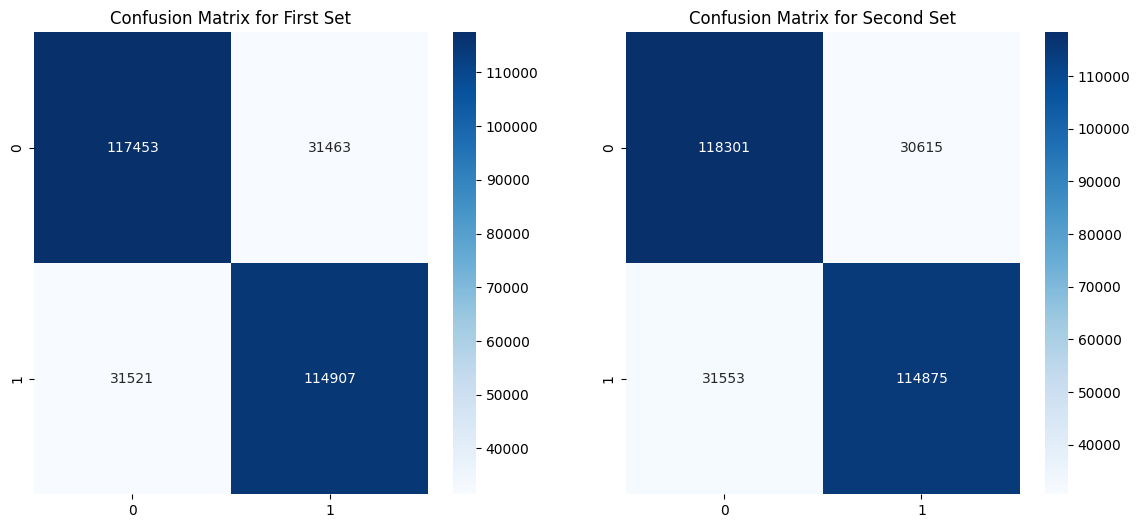

In [ ]:
# Predictions for both models
y_pred_1 = (model_1.predict(X_test) > 0.5).astype('int32')
y_pred_2 = (model_2.predict(X_test) > 0.5).astype('int32')

# Classification reports
report_1 = classification_report(y_test, y_pred_1)
report_2 = classification_report(y_test, y_pred_2)

# Confusion matrices
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)

# Display classification reports
print("Classification Report for First Set (Single LSTM Layer):\n", report_1)
print("\nClassification Report for Second Set (Two LSTM Layers):\n", report_2)

# Plot confusion matrices
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for First Set')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Second Set')

plt.show()


# Comparison of Results Between Two Assignments

## First Assignment: Logistic Regression, SVC, and Random Forest with CountVectorizer and TFIDFVectorizer

| Model                         | Vectorizer       | Precision (Class 0) | Recall (Class 0) | F1-Score (Class 0) | Precision (Class 4) | Recall (Class 4) | F1-Score (Class 4) | Accuracy |
|-------------------------------|------------------|---------------------|------------------|--------------------|---------------------|------------------|--------------------|----------|
| Logistic Regression Mimic      | CountVectorizer  | 0.79                | 0.74             | 0.77               | 0.76                | 0.80             | 0.78               | 0.77     |
| Logistic Regression Mimic      | TFIDFVectorizer  | 0.78                | 0.76             | 0.77               | 0.77                | 0.79             | 0.78               | 0.77     |
| SVC Mimic                      | CountVectorizer  | 0.79                | 0.78             | 0.78               | 0.78                | 0.79             | 0.79               | 0.79     |
| SVC Mimic                      | TFIDFVectorizer  | 0.79                | 0.78             | 0.78               | 0.78                | 0.79             | 0.79               | 0.79     |
| Random Forest Mimic            | CountVectorizer  | 0.79                | 0.78             | 0.78               | 0.79                | 0.79             | 0.79               | 0.79     |
| Random Forest Mimic            | TFIDFVectorizer  | 0.79                | 0.78             | 0.78               | 0.78                | 0.80             | 0.79               | 0.79     |

- **Best Overall Accuracy**: 0.79 (SVC and Random Forest with either Vectorizer)
- **Best Precision for Class 0**: Logistic Regression with CountVectorizer
- **Best Recall for Class 4**: Logistic Regression with CountVectorizer

## Second Assignment: LSTM Models

| Model                | Precision (Class 0) | Recall (Class 0) | F1-Score (Class 0) | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Accuracy |
|----------------------|---------------------|------------------|--------------------|---------------------|------------------|--------------------|----------|
| Single LSTM Layer     | 0.79                | 0.79             | 0.79               | 0.79                | 0.78             | 0.78               | 0.79     |
| Two LSTM Layers       | 0.79                | 0.79             | 0.79               | 0.79                | 0.78             | 0.79               | 0.79     |

- **Best Accuracy**: 0.79 (Both Single and Two LSTM Layers)
- **Similar Results**: Both models perform similarly with equal precision, recall, and F1-score across classes.

## Conclusion

- The **LSTM models** perform similarly in terms of accuracy to **SVC and Random Forest** from the first assignment, with all models achieving an accuracy of **0.79**.
- **Logistic Regression** shows slightly lower accuracy (0.77), but it performs well with precision for Class 0 and recall for Class 4 in the CountVectorizer setup.
- **SVC and Random Forest** offer competitive performance when paired with both vectorizers, making them reliable options for classification tasks.


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install pypandoc

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Convert the notebook to PDF using nbconvert
!jupyter nbconvert --to pdf "/content/drive/My Drive/Colab Notebooks/PARTH_ TRIPATHI_071.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/PARTH_ TRIPATHI_071.ipynb to pdf
[NbConvertApp] Support files will be in PARTH_ TRIPATHI_071_files/
[NbConvertApp] Making directory ./PARTH_ TRIPATHI_071_files
[NbConvertApp] Writing 79244 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 121259 bytes to /content/drive/My Drive/Colab Notebooks/PARTH_ TRIPATHI_071.pdf
